In [ ]:
-----------------------------------------
Title: "Predicting Bike Rental Demand"
Author: 'Sahil chahal'
------------------------------------------

In [1]:
##################### Importing libraries ###############################
import pandas as pd
import os
import numpy as np
import matplotlib as mlt
import fancyimpute as fn
from fancyimpute import KNN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import datetime
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as STS
from random import randrange, uniform

F:\annaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
F:\annaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir("F:/project")

In [3]:
data=pd.read_csv("day.csv",sep=',')

In [4]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
#########exploratory data analysis######################
data['season'] = data['season'].astype('category')
data['mnth'] = data['mnth'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')
d1=data['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=datetime.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')
data['dteday']=d1
data['dteday']=data['dteday'].astype('category')
data.dtypes
data = data.drop(['instant', 'casual', 'registered'], axis=1)

In [6]:
#############Missing value analysis###################
missingval=pd.DataFrame(data.isnull().sum())

{'whiskers': [<matplotlib.lines.Line2D at 0x2545aecb6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x2545aecbf98>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545aecb588>],
 'medians': [<matplotlib.lines.Line2D at 0x2545aed3828>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545aed3c50>],
 'means': []}

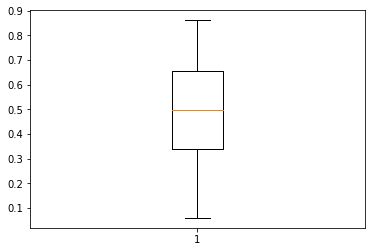

In [9]:
################Outlier Analysis###################

#saving numeric values#
cnames=["temp","atemp","hum","windspeed","cnt"]

#ploting boxplotto visualize outliers#
plt.boxplot(data['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2545af2ef60>,
 'caps': [<matplotlib.lines.Line2D at 0x2545af36860>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545af2ee10>],
 'medians': [<matplotlib.lines.Line2D at 0x2545af400f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545af40518>],
 'means': []}

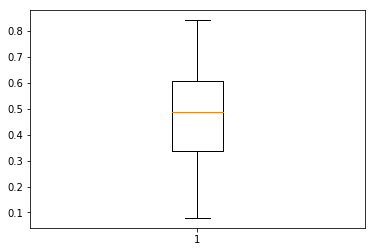

In [10]:
plt.boxplot(data['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2545af8ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x2545af95780>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545af8cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x2545af95fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545af9e438>],
 'means': []}

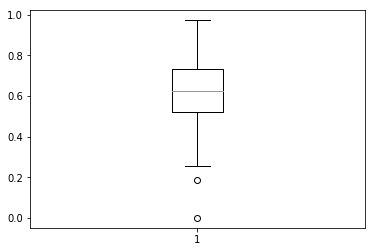

In [11]:
plt.boxplot(data['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2545afec278>,
 'caps': [<matplotlib.lines.Line2D at 0x2545afecb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x2545afec128>],
 'medians': [<matplotlib.lines.Line2D at 0x2545aff53c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2545aff57f0>],
 'means': []}

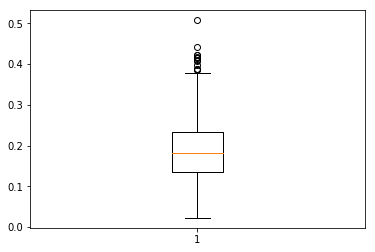

In [12]:
plt.boxplot(data['windspeed'])

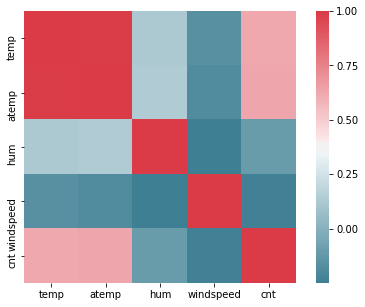

In [14]:
###################Feature selection####################3
#correlation plot
corr1=data.loc[:,cnames]
#set width and hight of plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr=corr1.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [15]:
############ Dimention Reduction #####################
data=data.drop(['atemp'],axis=1)

In [16]:
data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
5,06,1,0,1,0,4,1,1,0.204348,0.518261,0.089565,1606
6,07,1,0,1,0,5,1,2,0.196522,0.498696,0.168726,1510
7,08,1,0,1,0,6,0,2,0.165000,0.535833,0.266804,959
8,09,1,0,1,0,0,0,1,0.138333,0.434167,0.361950,822
9,10,1,0,1,0,1,1,1,0.150833,0.482917,0.223267,1321


In [17]:
################ Storing all the varables ######################3
name=["dteday","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","hum","windspeed"]

In [18]:
################## Creating the new data frame for dummies ###################
data1=pd.DataFrame(data[name])

In [19]:
##Create dummies for categorical variables
cat_names = ["dteday","season","mnth","weekday","weathersit"]

for i in cat_names:
    temp = pd.get_dummies(data[i], prefix = i)
    data1 = data1.join(temp)

In [20]:
data1 =data1.join(data['cnt'])

In [21]:
data1.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,...,0,0,0,0,0,1,0,1,0,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,...,0,0,0,0,0,0,0,1,0,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,...,1,0,0,0,0,0,1,0,0,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,...,0,1,0,0,0,0,1,0,0,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,...,0,0,1,0,0,0,1,0,0,1600
5,06,1,0,1,0,4,1,1,0.204348,0.518261,...,0,0,0,1,0,0,1,0,0,1606
6,07,1,0,1,0,5,1,2,0.196522,0.498696,...,0,0,0,0,1,0,0,1,0,1510
7,08,1,0,1,0,6,0,2,0.165000,0.535833,...,0,0,0,0,0,1,0,1,0,959
8,09,1,0,1,0,0,0,1,0.138333,0.434167,...,0,0,0,0,0,0,1,0,0,822
9,10,1,0,1,0,1,1,1,0.150833,0.482917,...,1,0,0,0,0,0,1,0,0,1321


In [22]:
############### Dimention Reduction ########################
data1=data1.drop(["dteday","season","mnth","weekday","weathersit"],axis=1)

In [38]:
data1.columns.shape

(64,)

In [45]:
############# Model development #########################

#Divide data into train and test
X = data1.values[:, 0:63]
Y = data1.values[:,63]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [46]:
###### Decision tree ################################
fit_DT = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
predictions_DT = fit_DT.predict(X_test)


In [47]:
#### Define Mape #######
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [48]:
#### calculate error rate ####
MAPE(y_test,predictions_DT)

28.50254879999006

In [51]:
###### Random Forest ##################3
RFmodel = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)
RF_Predictions = RFmodel.predict(X_test)

In [52]:
MAPE(y_test, RF_Predictions)

17.060717593190695

In [ ]:
############### storing and extracting the results###############################
results=pd.DataFrame(RF_Predictions)
result=pd.DataFrame(X_test)
results=results.rename(columns={0:'cnt'})
result =result.join(results['cnt'])
result.to_csv("bike rental rf.csv",index=False)

In [53]:
#linear regression
model = STS.OLS(y_train, X_train).fit()
predictions_LR = model.predict(X_test) 

In [54]:
MAPE(y_test,predictions_LR)

17.518002773165087

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     56.53
Date:                Thu, 04 Oct 2018   Prob (F-statistic):          2.09e-188
Time:                        15:14:01   Log-Likelihood:                -4673.3
No. Observations:                 584   AIC:                             9463.
Df Residuals:                     526   BIC:                             9716.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2036.5147     64.936     31.362      0.000    1908.949    2164.080
x2            23.7762    165.783      0.143      0.886    -301.902     349.454
x3           646.9136     88.912      7.276      0.000     472.248     821.579
x4          4626.9592    459.448     10.071      0.000    3724.381    5529.538
x5         -1546.7278    330.205     -4.684      0.000   -2195.410    -898.045
x6         -3379.8104    460.076     -7.346      0.000   -4283.623   -2475.998
x7          -167.1589    169.805     -0.984      0.325    -500.738     166.420
x8           -27.3045    178.624     -0.153      0.879    -378.208     323.599
x9           243.3167    173.454      1.403      0.161     -97.430     584.064
x10          209.3896    188.957      1.108      0.268    -161.813     580.592
x11          161.8899    188.372      0.859      0.391    -208.164     531.944
x12          209.6444    173.771      1.206      0.228    -131.725     551.014
x13          -82.1049    165.755     -0.495      0.621    -407.729     243.519
x14           78.8305    165.098      0.477      0.633    -245.501     403.162
x15           73.5468    178.251      0.413      0.680    -276.625     423.719
x16           99.2259    173.268      0.573      0.567    -241.156     439.608
x17          309.6147    177.685      1.742      0.082     -39.444     658.673
x18          157.5032    173.957      0.905      0.366    -184.232     499.238
x19          137.6244    161.732      0.851      0.395    -180.096     455.345
x20           51.2712    178.401      0.287      0.774    -299.194     401.736
x21          356.3159    169.105      2.107      0.036      24.112     688.519
x22          299.2574    164.982      1.814      0.070     -24.847     623.362
x23          437.8554    179.109      2.445      0.015      85.998     789.713
x24         -139.3691    179.430     -0.777      0.438    -491.857     213.119
x25          202.1714    178.210      1.134      0.257    -147.919     552.262
x26          220.0734    179.270      1.228      0.220    -132.099     572.246
x27          103.0643    171.723      0.600      0.549    -234.283     440.412
x28         -261.0464    172.170     -1.516      0.130    -599.271      77.179
x29          269.1409    184.167      1.461      0.145     -92.653     630.935
x30         -131.4810    178.932     -0.735      0.463    -482.991     220.029
x31         -157.0360    169.142     -0.928      0.354    -489.312     175.240
x32           47.6661    165.548      0.288      0.774    -277.551     372.883
x33          -95.6789    163.188     -0.586      0.558    -416.259     224.902
x34         -167.0313    161.798     -1.032      0.302    -484.881     150.818
x35         -308.7423    189.964     -1.625      0.105    -681.923      64.438
x36         -260.6195    173.759     -1.500      0.134    -601.966      80.727
x3

In [142]:
############### storing and extracting the results###############################
results=pd.DataFrame(predictions_LR)
result=pd.DataFrame(X_test)
results=results.rename(columns={0:'cnt'})
result =result.join(results['cnt'])
result.to_csv("bike rental lr.csv",index=False)